In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
import matplotlib.pyplot as plt


# import rpy2's package module
import rpy2.robjects.packages as rpackages


from rpy2.robjects.packages import importr
import rpy2.robjects as ro

from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [2]:
X=np.array([[1,2]]).T
y=np.array([[1,2]]).T

In [3]:
pred=np.array([list(range(20))]).T
p = gpr.predict(pred)

NameError: name 'gpr' is not defined

In [4]:
plt.plot(p)
plt.show()

NameError: name 'p' is not defined

In [8]:
# baggedModel in R
ro.r('x=c()')
ro.r('x[1]=22')
ro.r('x[2]=44')
print(ro.r('x'))



[22. 44.]


In [9]:
d = {'col1': [1, 2,3,4]}
df = pd.DataFrame(data=d)
df

# Convert Pandas DataFrame to R Dataframe as variable 'sample'
rdf = pandas2ri.py2ri(df)
ro.globalenv['sample'] = rdf

print(ro.r('sample'))

# import R's utils package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# utils.install_packages('forecast')

forecast = importr('forecast')

# ro.r('loadNameSpace(forecast)')
# ro.r('library(forecast)')
ro.r('dft_train=ts(sample[c(1:2),])')
ro.r('model <- ets(dft_train)')
ro.r('baggedETS(model)')

   col1
0     1
1     2
2     3
3     4


/Users/DaveSomo/anaconda3/envs/deeplearning/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/Users/DaveSomo/anaconda3/envs/deeplearning/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  failed to download mirrors file (internet routines cannot be loaded); using local file '/Users/DaveSomo/anaconda3/envs/deeplearning/lib/R/doc/CRAN_mirrors.csv'

  warnings.warn(x, RRuntimeWarning)
/Users/DaveSomo/anaconda3/envs/deeplearning/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘forecast’

  warnings.warn(x, RRuntimeWarning)
/Users/DaveSomo/anaconda3/envs/deeplearning/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/DaveSomo/anaconda3/envs/deeplearning/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntime

RRuntimeError: Error in loadNamespace(name) : there is no package called ‘forecast’


In [10]:
ro.r('packageDescription("forecast")')

array([-2147483648], dtype=int32)

In [5]:
### 6/26: Data Pipleline for Python and R ###

In [6]:
def prepare_data(filepath, top_n=10):
    """
    Function reads in given CSV and prepares it by doing the following:
    - transposes to get date x SKU structure
    - insert additional column, summing up total sales for each SKU
    - create 2 dataframes: the top n selling SKUs datafame, and a dataframe containing the other SKUs and totals
    """
    
    # Read CSV, fill NaNs as 0s, and create Total column. This column only used for finding top-selling N SKUs
    raw_df = pd.read_csv(filepath)
    indexed_df = raw_df.set_index('product')
    indexed_df = indexed_df.fillna(0)
    indexed_df['Total'] = indexed_df.sum(axis=1, skipna=True)

    # Sales of top N SKUs each timestamp
    top_n_SKU_df = indexed_df.nlargest(top_n, 'Total')

    # Sum of sales for the rest of the SKUs each timestamp
    rest_n = indexed_df.loc[~indexed_df.index.isin(top_n_SKU_df.index)]
    rest_n_agg_sales = rest_n.sum(axis=0, skipna=True)

    # Sum of sales for all SKUs each timestamp
    total_sales = indexed_df.sum(axis=0)

    # Drop Total column since it was only used to find the top-selling SKUs
    df = top_n_SKU_df.drop(columns=['Total'])
    
    # Transpose from SKUxDate to DatexSKU structure, and add 2 new columns: n_rest, total
    df = df.transpose()
    df['n_rest'] = rest_n_agg_sales
    df['total'] = total_sales

    return df

In [7]:
df = prepare_data("./100kskus.csv", top_n=10)

df.to_csv("./topNSKUs.csv")
df

product,1174,1176,1173,46147,1175,1177,103762,103772,46148,876,n_rest,total
1/1/2017,2.0,2.0,1.0,23.0,2.0,4.0,0.0,0.0,10.0,1.0,6305.0,6350.0
1/2/2017,4.0,1.0,0.0,26.0,0.0,2.0,0.0,0.0,17.0,2.0,8180.0,8232.0
1/3/2017,2.0,3.0,0.0,17.0,4.0,1.0,0.0,0.0,19.0,1.0,13713.0,13760.0
1/4/2017,1.0,1.0,3.0,16.0,2.0,3.0,0.0,0.0,17.0,0.0,9769.0,9812.0
1/5/2017,0.0,4.0,2.0,20.0,1.0,2.0,0.0,0.0,18.0,0.0,10723.0,10770.0
1/6/2017,5.0,2.0,6.0,13.0,6.0,1.0,0.0,0.0,13.0,0.0,8562.0,8608.0
1/7/2017,6.0,4.0,5.0,19.0,4.0,0.0,0.0,0.0,14.0,1.0,6888.0,6941.0
1/8/2017,4.0,2.0,2.0,23.0,0.0,0.0,0.0,0.0,21.0,1.0,7131.0,7184.0
1/9/2017,3.0,2.0,2.0,28.0,1.0,0.0,0.0,0.0,4.0,2.0,7017.0,7059.0
1/10/2017,1.0,4.0,4.0,13.0,7.0,6.0,0.0,0.0,15.0,0.0,7537.0,7587.0


In [9]:
# train_recs = 290
n_train_recs = 200
n_restarts = 10


In [10]:
# Split train and test data
univar_df = df.reset_index(drop=True)

train_df = univar_df.iloc[0:n_train_recs,]
test_df = univar_df.iloc[n_train_recs::,]

# # Time is the x variable
# train_X = list(train_df.index)
# test_X = list(test_df.index)


In [12]:
kernel=[
1.0* RBF() +
1.0* RBF() *
1.0* ExpSineSquared(periodicity=7.0,length_scale_bounds=(1,10),periodicity_bounds=(7, 7) )
]   

gp = GaussianProcessRegressor(kernel=kernel[0], n_restarts_optimizer=n_restarts)

In [13]:
fit = {}
pred = {}
for col in train_df.columns:
    
    # Train
    vec = train_df[col]
    train_X = np.reshape(vec.index.values, (-1,1))
    y = np.reshape(vec.values, (-1,1))
    
    fit[col] = gp.fit(train_X,y)
    
    # Test
    test_X = np.reshape(test_df[col].index.values, (-1,1))
    pred[col] = gp.predict(test_X)


pred;

In [14]:
for key in pred.keys():
    pred[key] = pred[key].flatten()
pred

{103762: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 103772: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [15]:
pred_df = pd.DataFrame.from_dict(pred)
pred_df

,total,n_rest,46147,46148,876,103762,1173,1174,1175,1176,1177,103772
0,1.213590e+04,1324.059010,1.147556e+01,5.694812e+00,0.891751,0.0,1.583327e+01,8.775576e+00,5.506898e+01,6.888953e+01,5.849733e+01,0.0
1,6.480480e+03,1324.058997,2.969470e+00,3.572300e+00,0.767949,0.0,9.780555e+00,-3.257691e+00,5.080831e+01,6.343600e+01,5.536013e+01,0.0
2,7.288050e+03,1324.058985,6.800924e-01,1.868191e+00,0.762373,0.0,4.799765e+00,-7.482264e+00,4.365415e+01,5.666572e+01,4.886473e+01,0.0
3,6.936717e+03,1324.058972,2.128490e-01,8.023572e-01,0.889954,0.0,3.059042e+00,-6.255416e+00,3.715459e+01,5.150538e+01,4.402080e+01,0.0
4,7.207677e+03,1324.058959,9.122102e-02,2.815578e-01,1.056387,0.0,3.355901e+00,-4.921332e+00,3.210967e+01,4.688491e+01,4.175814e+01,0.0
5,4.599203e+03,1324.058946,3.168893e-02,8.065077e-02,1.126278,0.0,4.010577e+00,-5.576533e+00,2.710000e+01,4.071968e+01,3.945704e+01,0.0
6,2.670606e+03,1324.058933,5.041858e-03,1.887067e-02,1.051537,0.0,3.996192e+00,-6.454721e+00,2.087561e+01,3.236992e+01,3.415683e+01,0.0
7,1.206413e+03,1324.058920,2.787134e-04,3.611260e-03,0.898318,0.0,3.130198e+00,-5.841836e+00,1.419530e+01,2.321380e+01,2.596708e+01,0.0
8,4.540678e+02,1324.058907,6.975424e-06,5.660446e-04,0.775044,0.0,2.020746e+00,-4.146758e+00,8.683174e+00,1.532064e+01,1.765057e+01,0.0
9,2.924570e+02,1324.058894,1.485597e-07,7.277528e-05,0.769240,0.0,1.221658e+00,-2.499162e+00,5.022575e+00,9.702741e+00,1.136977e+01,0.0


In [16]:
# Update index to consider omitted train data (and indices)
pred_df.index = pred_df.index + n_train_recs
pred_df

,total,n_rest,46147,46148,876,103762,1173,1174,1175,1176,1177,103772
200,1.213590e+04,1324.059010,1.147556e+01,5.694812e+00,0.891751,0.0,1.583327e+01,8.775576e+00,5.506898e+01,6.888953e+01,5.849733e+01,0.0
201,6.480480e+03,1324.058997,2.969470e+00,3.572300e+00,0.767949,0.0,9.780555e+00,-3.257691e+00,5.080831e+01,6.343600e+01,5.536013e+01,0.0
202,7.288050e+03,1324.058985,6.800924e-01,1.868191e+00,0.762373,0.0,4.799765e+00,-7.482264e+00,4.365415e+01,5.666572e+01,4.886473e+01,0.0
203,6.936717e+03,1324.058972,2.128490e-01,8.023572e-01,0.889954,0.0,3.059042e+00,-6.255416e+00,3.715459e+01,5.150538e+01,4.402080e+01,0.0
204,7.207677e+03,1324.058959,9.122102e-02,2.815578e-01,1.056387,0.0,3.355901e+00,-4.921332e+00,3.210967e+01,4.688491e+01,4.175814e+01,0.0
205,4.599203e+03,1324.058946,3.168893e-02,8.065077e-02,1.126278,0.0,4.010577e+00,-5.576533e+00,2.710000e+01,4.071968e+01,3.945704e+01,0.0
206,2.670606e+03,1324.058933,5.041858e-03,1.887067e-02,1.051537,0.0,3.996192e+00,-6.454721e+00,2.087561e+01,3.236992e+01,3.415683e+01,0.0
207,1.206413e+03,1324.058920,2.787134e-04,3.611260e-03,0.898318,0.0,3.130198e+00,-5.841836e+00,1.419530e+01,2.321380e+01,2.596708e+01,0.0
208,4.540678e+02,1324.058907,6.975424e-06,5.660446e-04,0.775044,0.0,2.020746e+00,-4.146758e+00,8.683174e+00,1.532064e+01,1.765057e+01,0.0
209,2.924570e+02,1324.058894,1.485597e-07,7.277528e-05,0.769240,0.0,1.221658e+00,-2.499162e+00,5.022575e+00,9.702741e+00,1.136977e+01,0.0


In [17]:
### 6/26: Read CSV that was generated by R's Bagged Model
bm_pred_df = pd.read_csv("./BaggedModel_pred.csv")
bm_pred_df

,1174,1176,1173,46147,1175,1177,103762,103772,46148,876,n_rest,total
0,24.945368,63.240957,13.140054,24.456554,49.130163,42.466326,1.270000e-14,1.270000e-14,14.489395,0.646729,20888.46517,21383.69001
1,24.945300,62.529472,14.210849,24.585595,48.971802,42.161739,1.270000e-14,1.270000e-14,13.295335,0.697622,18510.94591,19067.49186
2,22.786737,60.953156,10.602756,22.070646,48.664566,41.587593,1.270000e-14,1.270000e-14,11.451829,0.512612,20548.75290,21439.97892
3,19.397969,58.986290,3.910308,27.780668,46.589481,41.634453,1.270000e-14,1.270000e-14,15.487273,0.603131,16290.87984,17189.14024
4,23.048241,60.057688,13.079897,24.689057,47.616270,41.966770,1.270000e-14,1.270000e-14,14.066731,0.986578,15534.20333,16325.03346
5,23.684359,60.608937,13.674278,23.443223,48.876149,42.249036,1.270000e-14,1.270000e-14,13.329454,0.902939,14728.75431,15323.93313
6,26.018905,62.337434,20.146149,24.411909,49.332649,42.405049,1.270000e-14,1.270000e-14,14.159418,0.799622,18350.81335,19242.90232
7,24.945368,63.240957,13.140054,27.412065,49.130163,42.466326,1.270000e-14,1.270000e-14,15.636076,0.646729,21012.90163,21542.87347
8,24.945300,62.529472,14.210849,27.553356,48.971802,42.161739,1.270000e-14,1.270000e-14,14.397445,0.697622,18621.34485,19210.79530
9,22.786737,60.953156,10.602756,24.811450,48.664566,41.587593,1.270000e-14,1.270000e-14,12.498696,0.512612,20678.18585,21600.96447


In [18]:
bm_pred_df.index = bm_pred_df.index + n_train_recs
bm_pred_df;


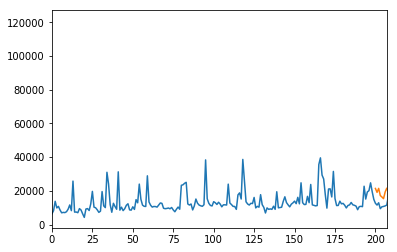

In [19]:
plt.plot(df['total'].reset_index(drop=True))

plt.plot(pd.DataFrame(bm_pred_df['total']))
plt.xlim(xmin=0)
plt.xlim(xmax=207)
plt.show()

In [64]:
nrow=6
ncol=2
%matplotlib inline

def plot_dataframe(obs_df, pred_df, xmin=0, xmax=250):
    
    num_plots=len(df.columns)

    for i in range(num_plots):
        col = df.columns[i]
        
        # Try indexing column as intger or string
        try:
            preds=pred_df[str(col)]
        except KeyError:
            preds=pred_df[col]
        
        plt.subplot(6,2,i+1)
        plt.plot(obs_df[col].reset_index(drop=True))
        plt.plot(pd.DataFrame(preds))
        plt.title(col)
        plt.xlim(xmin=xmin)
        plt.xlim(xmax=xmax)

    plt.figure(figsize=(4,4))
#     plt.tight_layout()


#     plt.subplots_adjust(
#     left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 12.0)
    plt.show()

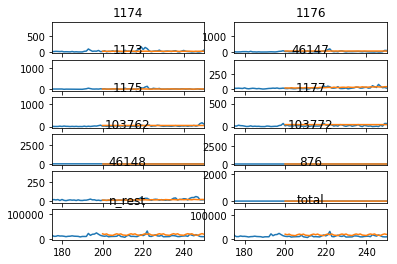

<Figure size 288x288 with 0 Axes>

In [65]:
plot_dataframe(df, bm_pred_df, xmin=175, xmax=250)

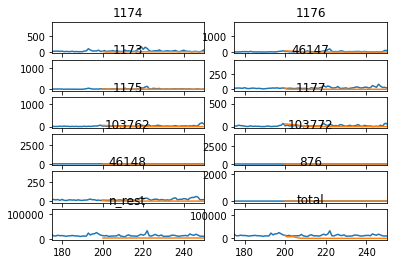

<Figure size 288x288 with 0 Axes>

In [36]:
plot_dataframe(df, pred_df, xmin=175, xmax=250)

In [345]:
df.columns.astype(str)

Index(['1174', '1176', '1173', '46147', '1175', '1177', '103762', '103772',
       '46148', '876', 'n_rest', 'total'],
      dtype='object', name='product')

In [353]:
list(map(int, bm_pred_df.columns))

ValueError: invalid literal for int() with base 10: 'n_rest'